In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import fftpack

%matplotlib inline

In [2]:
df = pd.read_csv('Sunspots.csv')
df.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [3]:
df.shape

(3252, 3)

In [4]:
df.dtypes

Unnamed: 0                             int64
Date                                  object
Monthly Mean Total Sunspot Number    float64
dtype: object

In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


In [7]:
df.dtypes

Date                                 datetime64[ns]
Monthly Mean Total Sunspot Number           float64
dtype: object

In [8]:
df.rename(columns = {'Monthly Mean Total Sunspot Number':'Number'}, inplace = True) 
df.head()

,Date,Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


In [9]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.head()

,Date,Number,Day,Month,Year
0,1749-01-31,96.7,31,1,1749
1,1749-02-28,104.3,28,2,1749
2,1749-03-31,116.7,31,3,1749
3,1749-04-30,92.8,30,4,1749
4,1749-05-31,141.7,31,5,1749


In [10]:
df.describe()

,Number,Day,Month,Year
count,3252.000000,3252.000000,3252.000000,3252.00000
mean,82.070695,30.436654,6.500000,1884.00000
std,67.864736,0.816236,3.452583,78.24246
min,0.000000,28.000000,1.000000,1749.00000
25%,24.200000,30.000000,3.750000,1816.00000
50%,67.750000,31.000000,6.500000,1884.00000
75%,122.700000,31.000000,9.250000,1952.00000
max,398.200000,31.000000,12.000000,2019.00000


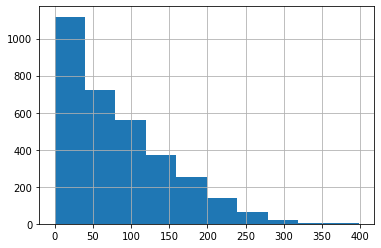

In [11]:
df.Number.hist()

Text(0.5, 1.0, 'Number of Spots Distribution by Day')

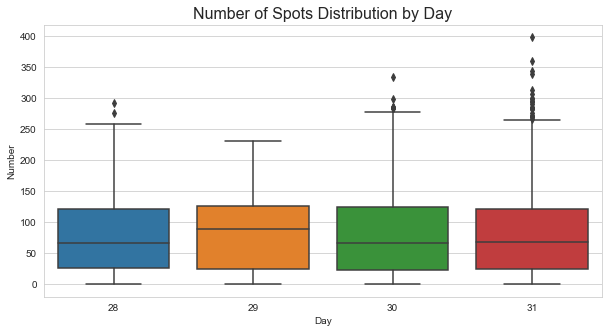

In [12]:
sns.set_style("whitegrid") 
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x = 'Day', y = 'Number', data = df, ax=ax)
ax.set_title('Number of Spots Distribution by Day', size=16)

Text(0.5, 1.0, 'Number of Spots Distribution by Month')

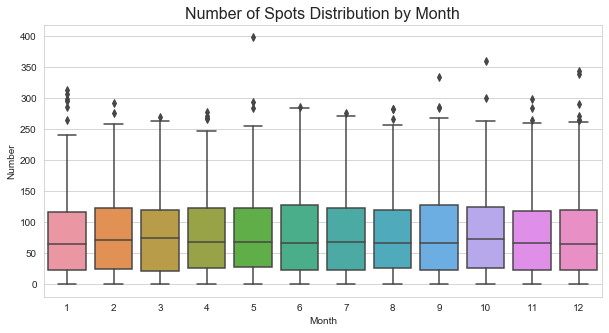

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x = 'Month', y = 'Number', data = df, ax=ax)
ax.set_title('Number of Spots Distribution by Month', size=16)

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


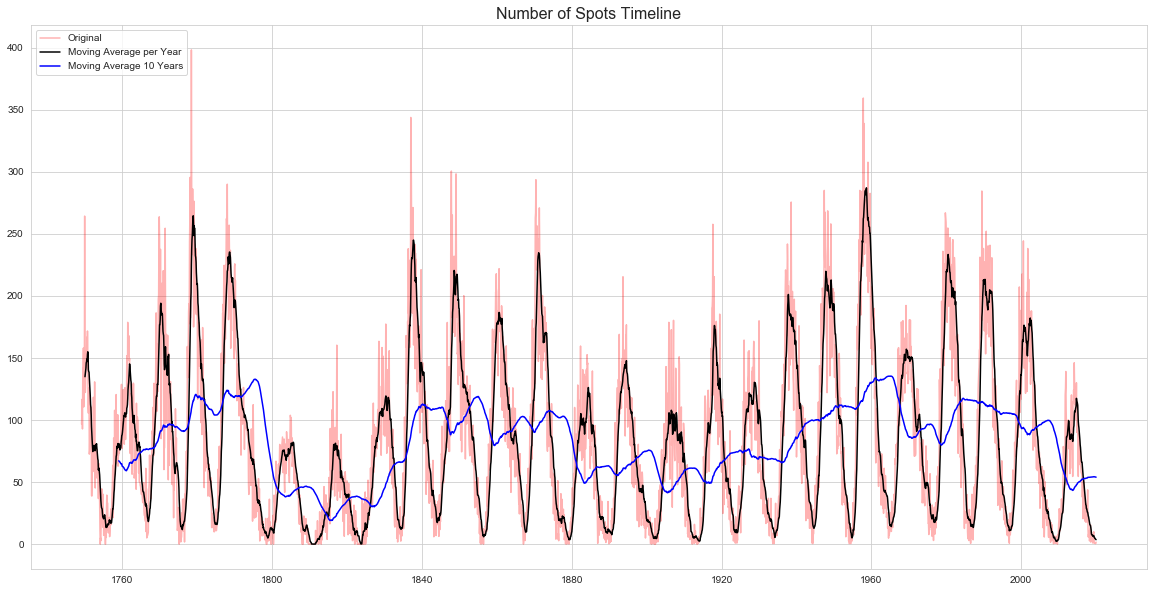

In [14]:
rolling_mean = df.Number.rolling(window=12).mean()
rolling_mean2 = df.Number.rolling(window=120).mean()

fig = plt.figure(figsize=(20,10))
plt.plot(df.Date, df.Number, label='Original', alpha=0.3, color='red')
plt.plot(df.Date, rolling_mean, label='Moving Average per Year', color='black')
plt.plot(df.Date, rolling_mean2,  label='Moving Average 10 Years', color='blue')

plt.title('Number of Spots Timeline', size=16)
plt.legend(loc='upper left')
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


(0, 300000)

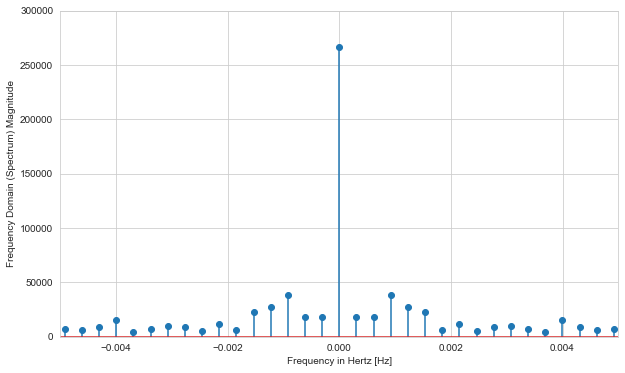

In [15]:
f_s = 0.01
x = df.Number
X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) 

fig, ax = plt.subplots(figsize=(10,6))

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(0, 300000)

Text(0.5, 1.0, 'Number of Spots in Each Decade')

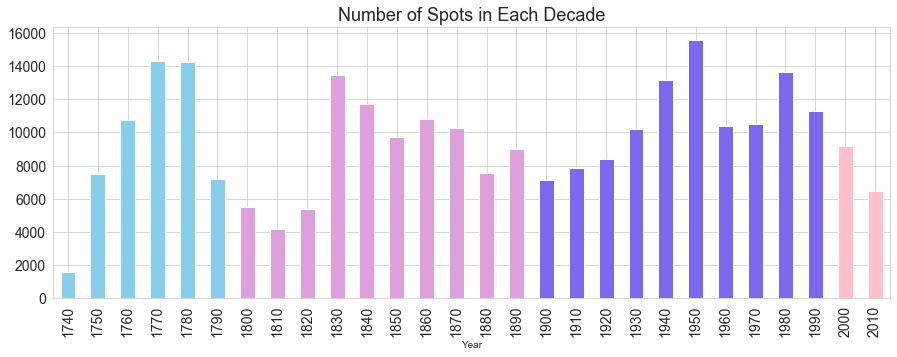

In [16]:
o = 'skyblue'
t = 'plum'
h = 'mediumslateblue'
f = 'pink'
colors = [o, o, o, o, o, o, 
          t, t, t, t, t, t, t, t, t, t,
          h, h, h, h, h, h, h, h, h, h,
          f, f]

df_decade = df['Number'].groupby((df.Year//10)*10).sum()
df_decade.plot(kind='bar', figsize=(15,5), color=colors, fontsize=14)

plt.title('Number of Spots in Each Decade', size=18)

Text(0.5, 1.0, 'Number of Spots in Each Century')

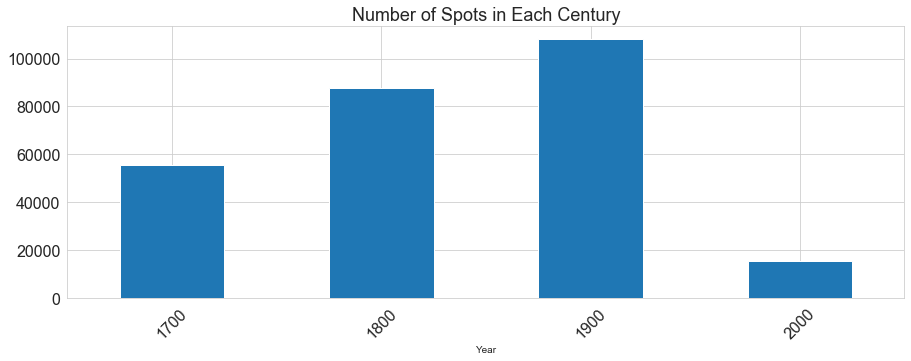

In [17]:
df_decade = df['Number'].groupby((df.Year//100)*100).sum()
df_decade.plot(kind='bar', rot=45, figsize=(15,5), fontsize=16)

plt.title('Number of Spots in Each Century', size=18)

Text(0.5, 1.0, 'Positive Correlation Relationship between an observation and the previous observation')

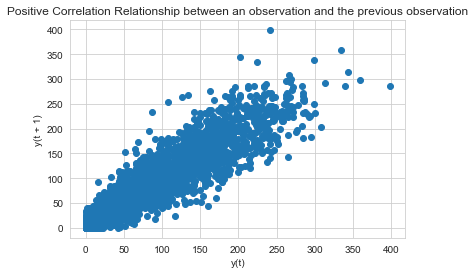

In [18]:
pd.plotting.lag_plot(df['Number'])
plt.title('Positive Correlation Relationship between an observation and the previous observation')